## Product and Retail Analysis

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import datetime

sns.set_style('whitegrid')
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Use zipfile
# from urllib.request import urlopen
# from zipfile import ZipFile
# zipurl = 'https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/ecommerce_data.zip'
# zipresp = urlopen(zipurl)
# tempzip = open('tempfile.zip', 'wb')
# tempzip.write(zipresp.read())
# tempzip.close()
# zf = ZipFile('tempfile.zip')
# zf.extractall(path='')
# zf.close()

In [3]:
df = pd.read_csv('ecommerce_data.csv', encoding='ISO=8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Check for null columns
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [6]:
# Check for null rows
df[df.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [7]:
# Change InvoiceDate from object to datetime
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# Drop missing values and check values
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
# Change CustomerID from type String to Int
df.CustomerID = df.CustomerID.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null int64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [10]:
# Describe dataframe
df.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


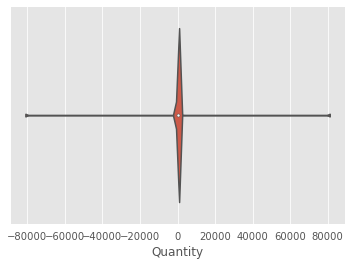

In [11]:
# Plot quantity
ax = sns.violinplot(x=df.Quantity)

In [12]:
# Remove negative quantities
df = df[df.Quantity > 0]
df.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


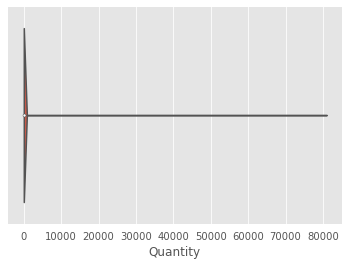

In [13]:
# Now plot quantity
ax = sns.violinplot(x=df.Quantity)

In [14]:
# Create AmountSpent column
df['AmountSpent'] = df.Quantity * df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [15]:
# Add Month, Day, and Hour columns
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases
# M is offset alias
df['month_year'] = df.InvoiceDate.dt.to_period('M')
datetimes = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df = df.join(pd.concat((getattr(df.InvoiceDate.dt, i).rename(i) for i in datetimes), axis=1))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 17 columns):
InvoiceNo      397924 non-null object
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null datetime64[ns]
UnitPrice      397924 non-null float64
CustomerID     397924 non-null int64
Country        397924 non-null object
AmountSpent    397924 non-null float64
month_year     397924 non-null period[M]
year           397924 non-null int64
month          397924 non-null int64
day            397924 non-null int64
dayofweek      397924 non-null int64
dayofyear      397924 non-null int64
weekofyear     397924 non-null int64
quarter        397924 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(9), object(4), period[M](1)
memory usage: 64.6+ MB


## Exploratory Data Analysis

In [17]:
# Create sales per customer
# as_index=False is effectively “SQL-style” grouped output
sales_per_customer = df.groupby(['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count().sort_values('InvoiceNo', ascending=False)
sales_per_customer.columns = ['CustomerID', 'Country', 'NumberOfSales']
sales_per_customer.head()

,CustomerID,Country,NumberOfSales
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


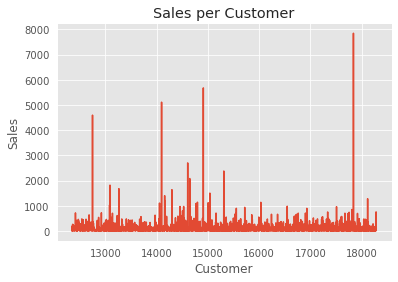

In [18]:
# Plot sales per customer
orders = df.groupby(['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count()
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customer')
plt.ylabel('Sales')
plt.title('Sales per Customer')
plt.show()

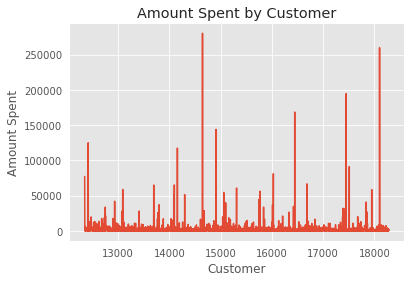

In [19]:
# Amount spent by Customers
money_spent = df.groupby(['CustomerID', 'Country'], as_index=False)['AmountSpent'].sum()
plt.plot(money_spent.CustomerID, money_spent.AmountSpent)
plt.xlabel('Customer')
plt.ylabel('Amount Spent')
plt.title('Amount Spent by Customer')
plt.show()

In [20]:
# Money made per customer
spent_per_customer = df.groupby(['CustomerID', 'Country'], as_index=False)['AmountSpent'].sum().sort_values('AmountSpent', ascending=False)
spent_per_customer.columns = ['CustomerID', 'Country', 'AmountSpent']
spent_per_customer.reset_index(inplace=True, drop=True)
spent_per_customer.head()

,CustomerID,Country,AmountSpent
0,14646,Netherlands,280206.02
1,18102,United Kingdom,259657.30
2,17450,United Kingdom,194550.79
3,16446,United Kingdom,168472.50
4,14911,EIRE,143825.06


In [21]:
# Create year_month, hour columns
df.insert(loc=2, column='year_month', value=df.InvoiceDate.map(lambda x: 100*x.year + x.month))
df.insert(loc=5, column='hour', value=df.InvoiceDate.dt.hour)
df.head()

,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,48,4
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,48,4
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4


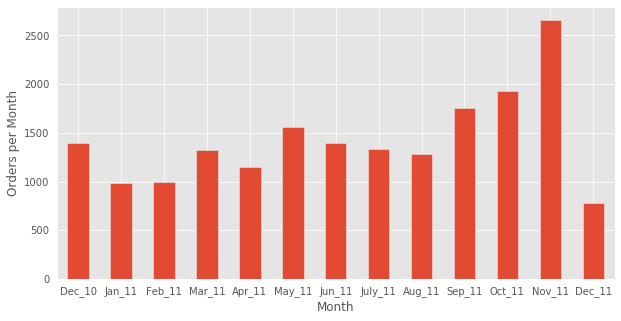

In [22]:
# Show order per month
ax = df.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar', figsize=(10,5))
ax.set_xlabel('Month')
ax.set_ylabel('Orders per Month')
ax.set_xticklabels(('Dec_10', 'Jan_11', 'Feb_11', 'Mar_11', 'Apr_11', 'May_11', 'Jun_11', 'July_11', 'Aug_11', 'Sep_11', 'Oct_11', 'Nov_11', 'Dec_11'), rotation='horizontal')
plt.show()

In [23]:
# Orders by day
df.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index()

[0]    2863
[1]    3185
[2]    3455
[3]    4033
[4]    2831
[6]    2169
Name: dayofweek, dtype: int64

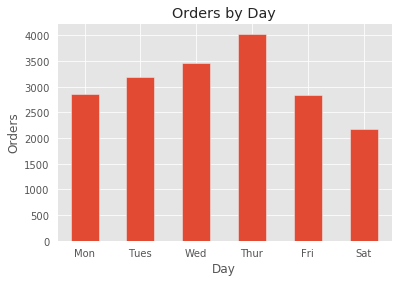

In [24]:
# Plot orders by day
ax = df.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index().plot.bar()
ax.set_xlabel('Day')
ax.set_ylabel('Orders')
ax.set_title('Orders by Day')
ax.set_xticklabels(('Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat'), rotation='horizontal')
plt.show()

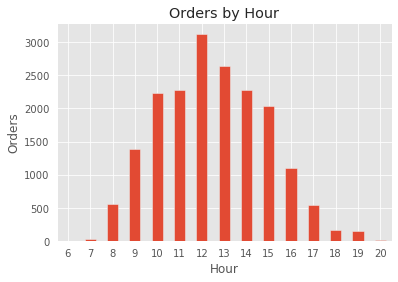

In [25]:
# Orders by hour
ax = df.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index().plot.bar()
ax.set_xlabel('Hour')
ax.set_ylabel('Orders')
ax.set_title('Orders by Hour')
ax.set_xticklabels(range(6,21), rotation='horizontal')
plt.show()

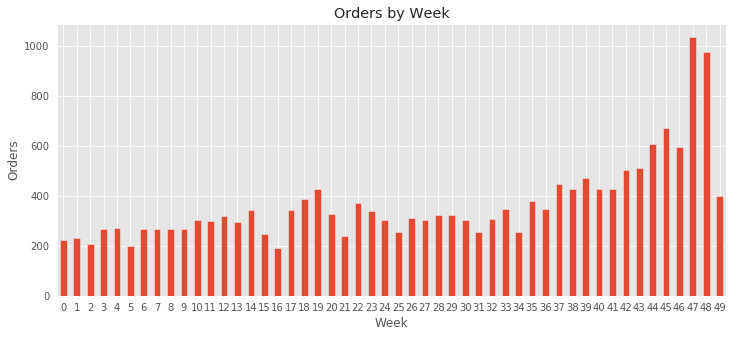

In [26]:
# Orders by week
ax = df.groupby('InvoiceNo')['weekofyear'].unique().value_counts().iloc[:-1].sort_index().plot.bar(figsize=(12,5))
ax.set_xlabel('Week')
ax.set_ylabel('Orders')
ax.set_title('Orders by Week')
ax.set_xticklabels(range(0,52), rotation='horizontal')
plt.show()

## Analysis of Unit Prices per Item

In [27]:
# Describe Unit Prices
df.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

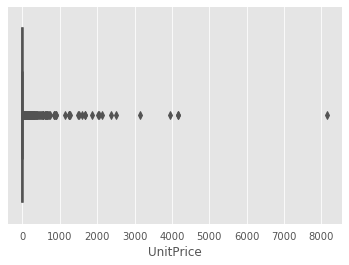

In [28]:
# Plot distribution
sns.boxplot(df.UnitPrice)
plt.show()

In [29]:
# Show the 0 priced items
free = df[df.UnitPrice == 0]
print(len(free))
free.head()

40


,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
9302,537197,22841,201012,ROUND CAKE TIN VINTAGE GREEN,1,14,2010-12-05 14:02:00,0.0,12647,Germany,0.0,2010-12,2010,12,5,6,339,48,4
33576,539263,22580,201012,ADVENT CALENDAR GINGHAM SACK,4,14,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,2010-12,2010,12,16,3,350,50,4
40089,539722,22423,201012,REGENCY CAKESTAND 3 TIER,10,13,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,2010-12,2010,12,21,1,355,51,4
47068,540372,22090,201101,PAPER BUNTING RETROSPOT,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,3,6,1,1
47070,540372,22553,201101,PLASTERS IN TIN SKULLS,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,3,6,1,1


In [30]:
# Free items by year
free.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

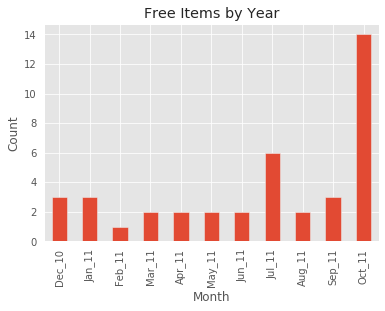

In [31]:
# Plot the free items by year
ax = free.year_month.value_counts().sort_index().plot.bar()
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Free Items by Year')
ax.set_xticklabels(('Dec_10', 'Jan_11', 'Feb_11', 'Mar_11', 'Apr_11', 'May_11', 'Jun_11', 'Jul_11', 'Aug_11', 'Sep_11', 'Oct_11', 'Nov_11'))
plt.show()

## Country Analysis

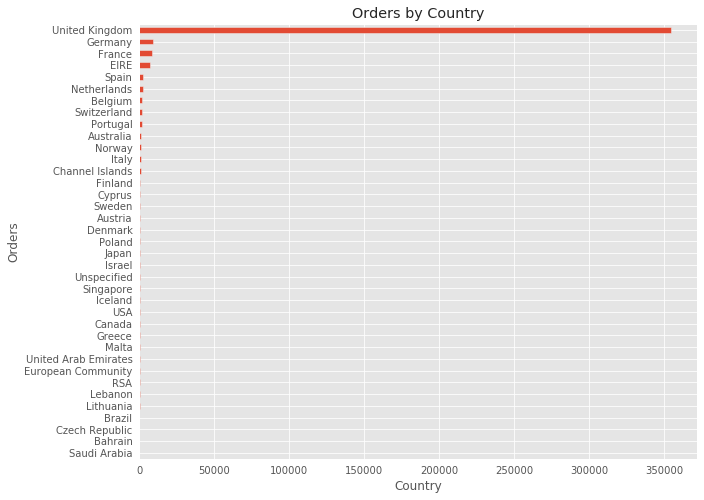

In [32]:
# Orders by country
ax = df.groupby('Country')['InvoiceDate'].count().sort_values().plot.barh(figsize=(10, 8))
ax.set_xlabel('Country')
ax.set_ylabel('Orders')
ax.set_title('Orders by Country')
plt.show()

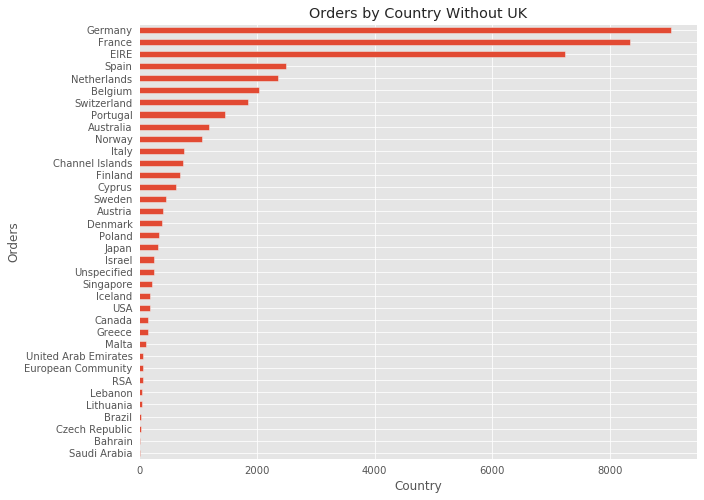

In [33]:
ax = df[df.Country != 'United Kingdom'].groupby('Country')['InvoiceDate'].count().sort_values().plot.barh(figsize=(10, 8))
ax.set_xlabel('Country')
ax.set_ylabel('Orders')
ax.set_title('Orders by Country Without UK')
plt.show()

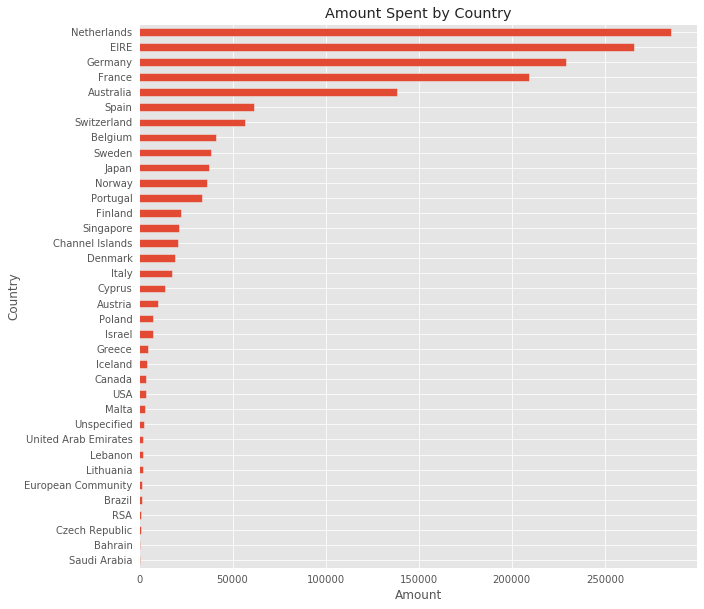

In [34]:
# Amount spent by country
ax = df[df.Country != 'United Kingdom'].groupby('Country')['AmountSpent'].sum().sort_values().plot.barh(figsize=(10,10))
ax.set_xlabel('Amount')
ax.set_ylabel('Country')
ax.set_title('Amount Spent by Country')
plt.show()

## Repeat Customers

In [35]:
# Get date range
print(f'Date Range: {df.InvoiceDate.min()} to {df.InvoiceDate.max()}')

Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [36]:
# Amount spent by repeat customer
invoice_customer = df[df.InvoiceDate < '2011-12-01'].groupby(['InvoiceNo', 'InvoiceDate']).agg({'AmountSpent': sum, 
                                                                             'CustomerID': max, 
                                                                             'Country': max}).reset_index().sort_values('AmountSpent', ascending=False)
invoice_customer.head()

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
1911,541431,2011-01-18 10:01:00,77183.60,12346,United Kingdom
7949,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
12446,567423,2011-09-20 11:05:00,31698.16,17450,United Kingdom
8135,556917,2011-06-15 13:37:00,22775.93,12415,Australia
14487,572209,2011-10-21 12:08:00,22206.00,18102,United Kingdom


In [37]:
repeat_customers_df = df[df.InvoiceDate < '2011-12-01'].groupby(['InvoiceNo', 'InvoiceDate']).agg({'AmountSpent': sum,
                                                       'CustomerID': max,
                                                       'Country': max}).reset_index()
repeat_customers = repeat_customers_df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'),
                                          'CustomerID']).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']
repeat_customers

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [38]:
# Unique Customers by Month (M)
unique_customers = df[df.InvoiceDate < '2011-12-01'].set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
print(unique_customers)

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64


In [39]:
# Ratio of repeat to unique customers
monthly_percentages = repeat_customers/unique_customers*100.0
print((monthly_percentages).round(2))

InvoiceDate
2010-12-31    29.72
2011-01-31    20.65
2011-02-28    20.18
2011-03-31    20.84
2011-04-30    19.86
2011-05-31    26.61
2011-06-30    22.20
2011-07-31    23.92
2011-08-31    21.18
2011-09-30    21.48
2011-10-31    23.75
2011-11-30    32.49
Freq: M, Name: CustomerID, dtype: float64


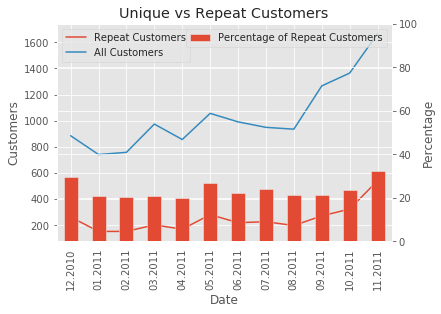

In [40]:
# Plot repeat, unique customers
ax = pd.DataFrame(repeat_customers.values).plot()
pd.DataFrame(unique_customers.values).plot(ax=ax, grid=True)
ax.set_xlabel('Date')
ax.set_ylabel('Customers')
ax.set_title('Unique vs Repeat Customers')

ax2 = pd.DataFrame(monthly_percentages.values).plot.bar(ax=ax, grid=True, secondary_y=True)
ax2.set_ylabel('Percentage')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat Customers'], loc='upper right')
ax2.set_ylim([0, 100])

plt.xticks(range(len(repeat_customers.index)), [x.strftime('%m.%Y') for x in repeat_customers.index])
plt.show()

In [41]:
# Monthly revenue and repeat customers
monthly_revenue = df[df.InvoiceDate < '2011-12-01'].set_index('InvoiceDate')['AmountSpent'].resample('M').sum()
repeat_customer_revenue = (invoice_customer.set_index('InvoiceDate')
                                            .groupby([pd.Grouper(freq='M'), 'CustomerID'])
                                            .filter(lambda x: len(x) > 1)
                                            .resample('M').sum()['AmountSpent'])
revenue_repeat_customer = repeat_customer_revenue/monthly_revenue*100.0
revenue_repeat_customer.round(2)

InvoiceDate
2010-12-31    62.71
2011-01-31    39.01
2011-02-28    42.77
2011-03-31    44.90
2011-04-30    41.66
2011-05-31    55.73
2011-06-30    56.91
2011-07-31    52.90
2011-08-31    49.14
2011-09-30    52.54
2011-10-31    55.23
2011-11-30    61.44
Freq: M, Name: AmountSpent, dtype: float64

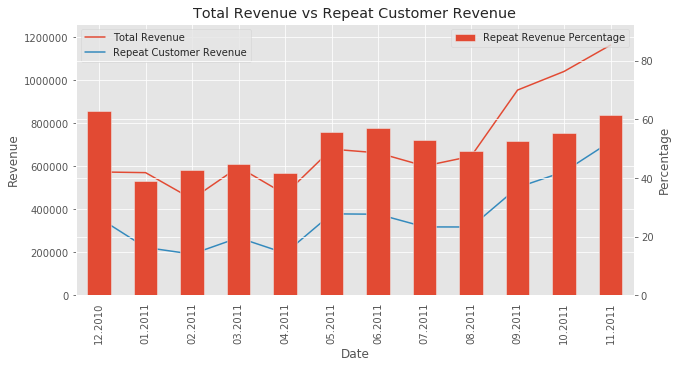

In [42]:
# Plot revenue repeat customer revenue
ax = pd.DataFrame(monthly_revenue.values).plot(figsize=(10, 5))
pd.DataFrame(repeat_customer_revenue.values).plot(ax=ax, grid=True)
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
ax.set_title('Total Revenue vs Repeat Customer Revenue')
ax.legend(['Total Revenue', 'Repeat Customer Revenue'])
ax.set_ylim([0, max(monthly_revenue.values)+100000])

ax2 = ax.twinx()
pd.DataFrame(revenue_repeat_customer.values).plot.bar(ax=ax2)
ax2.set_ylim([0, max(revenue_repeat_customer.values)+30])
ax2.set_ylabel('Percentage')
ax2.legend(['Repeat Revenue Percentage'])
ax.set_xticklabels([x.strftime('%m.%Y') for x in revenue_repeat_customer.index], rotation='vertical')

plt.show()

## Item Trends

In [43]:
# Items sold by month
item_month = df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()
item_month.head()

InvoiceDate  StockCode
2010-12-31   10002        224
             10120         16
             10123C         1
             10124A         4
             10124G         5
Name: Quantity, dtype: int64

In [44]:
# Sort items by 2011-11-30
last_months_items = item_month.loc['2011-11-30'].reset_index().sort_values('Quantity', ascending=False)
last_months_items.head()

,InvoiceDate,StockCode,Quantity
2371,2011-11-30,84826,12551
1567,2011-11-30,23084,12393
827,2011-11-30,22197,8458
738,2011-11-30,22086,5919
2488,2011-11-30,85099B,5678


In [45]:
# Top 5 items' sales per month
top_five = (df.loc[df['StockCode']
                   .isin(['23084', '84826', '22197', '22086', '85099B'])]
                   .set_index('InvoiceDate')
                   .groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum())
                   
top_five

InvoiceDate  StockCode
2010-12-31   22086         1697
             22197         2110
             84826          366
             85099B        2056
2011-01-31   22197         1697
             84826          480
             85099B        2625
2011-02-28   22086            2
             22197         2505
             84826           66
             85099B        2971
2011-03-31   22086           85
             22197         2034
             84826           60
             85099B        4924
2011-04-30   22086           11
             22197         1801
             84826            1
             85099B        2211
2011-05-31   22086           12
             22197         6738
             23084         1097
             85099B        3470
2011-06-30   22086          337
             22197         1989
             23084         1621
             84826            1
             85099B        3529
2011-07-31   22086          374
             22197         1787
             2308

In [46]:
# Monthly trend of top 5
trending_items = (top_five.reset_index()
                    .pivot('InvoiceDate', 'StockCode')
                    .fillna(0)
                    .reset_index()
                    .set_index('InvoiceDate'))

trending_items

Quantity                                  
StockCode      22086   22197    23084    84826  85099B
InvoiceDate                                           
2010-12-31    1697.0  2110.0      0.0    366.0  2056.0
2011-01-31       0.0  1697.0      0.0    480.0  2625.0
2011-02-28       2.0  2505.0      0.0     66.0  2971.0
2011-03-31      85.0  2034.0      0.0     60.0  4924.0
2011-04-30      11.0  1801.0      0.0      1.0  2211.0
2011-05-31      12.0  6738.0   1097.0      0.0  3470.0
2011-06-30     337.0  1989.0   1621.0      1.0  3529.0
2011-07-31     374.0  1787.0    236.0      2.0  2970.0
2011-08-31     480.0  5286.0   1813.0     72.0  5278.0
2011-09-30    2064.0  3772.0    102.0      0.0  4177.0
2011-10-31    3243.0  5644.0   6249.0     11.0  5237.0
2011-11-30    5919.0  8458.0  12393.0  12551.0  5678.0
2011-12-31    1393.0  5362.0   3691.0     92.0  1055.0

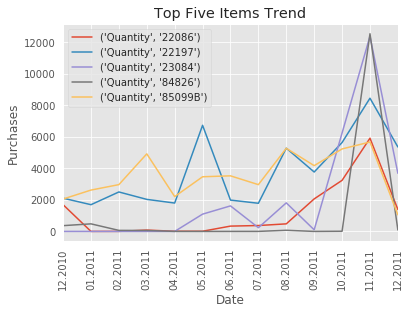

In [47]:
# Plot top five trends
ax = pd.DataFrame(trending_items.values).plot(grid=True)
ax.set_xlabel('Date')
ax.set_ylabel('Purchases')
ax.set_title('Top Five Items Trend')
ax.legend(trending_items.columns, loc='upper left')
plt.xticks(range(len(trending_items.index)), [x.strftime('%m.%Y') for x in trending_items.index], rotation='vertical')
plt.show()